<a href="https://colab.research.google.com/github/Ziker0k/pythonProjects/blob/main/5-Convolution/Svertka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal
import numpy as np
import time as tm
import matplotlib.pyplot as plt
#Свертка с параметром full
def conv(a, b):
    N = len(a)
    M = len(b)
    YN = N + M - 1
    y = [0.0 for i in range(YN)]
    for n in range(YN):
        for m in range(M):
            if 0 <= n - m and n - m < N:
                y[n] += a[n - m] * b[m]
    return y

#Свертка с параметром same
def conv_same(a, b):
    N = len(a)
    M = len(b)
    YN = N + M - 1
    y = [0.0 for i in range(YN)]
    ab=[]
    for n in range(YN):
        for m in range(M):
            if 0 <= n - m and n - m < N:
                y[n] += a[n - m] * b[m]
        if (N-2)/2 <= n <= M-1 + (N-1)/2:
            ab.append(y[n])
    return ab

#Быстрая свертка через БФП
def fast_conv(a, b):
    len_c = len(a) + len(b) - 1 # Размер свертки

    ftA = np.fft.fft(a,len_c) # Фурье 1 сигнала
    ftB = np.fft.fft(b,len_c) # Фурье 2 сигнала

    ftC = np.multiply(ftA, ftB) # Фурье выходного сигнала
    c = np.fft.ifft(ftC).real # Обратное фурье + берем реальную часть

    return c

In [ ]:
freq = 40
freq_discr = 1*1e5
time = 1
t = np.arange(0, time, 1/freq_discr)

x = signal.sawtooth(2 * np.pi * freq * t)

In [ ]:
#Свертка с использованием встроенной функции
time = tm.time()
np_convolve_discr = np.convolve(x, x, mode='full')
time_discr=tm.time()-time
print(tm.time()-time, " - Продолжительность дискретной свертки функцией convolve")

#Свертка своей функцией
time = tm.time()
#my_convolve_discr = conv(x, x)
print(tm.time()-time, " - Продолжительность дискретной свертки своим методом")

#Быстрая свертка с использованием функции из пакета signal
time = tm.time()
signal_convolve_fast = signal.fftconvolve(x, x, mode='full')
time_ffft = tm.time()-time
print(tm.time()-time, " - Продолжительность быстрой свертки функцией fftconvolve")

#Быстрая свертка своей функцией через БФП
time = tm.time()
my_convolve_fast = fast_conv(x, x)
print(tm.time()-time, " - Продолжительность быстрой свертки своим методом")
print(len(x))
print(time_discr/time_ffft)

4.4074389934539795  - Продолжительность дискретной свертки функцией convolve
7.605552673339844e-05  - Продолжительность дискретной свертки своим методом
0.014547109603881836  - Продолжительность быстрой свертки функцией fftconvolve
0.1958332061767578  - Продолжительность быстрой свертки своим методом
100000
304.4678580251997


Чем больше вычислений, тем эффективнее быстрая свертка, так как
# **N * M** - кол-во операций прямой свертки
# **N * log2(N)** - кол-во операций быстрой свертки
При больших значениях N*M > N*log2(N)




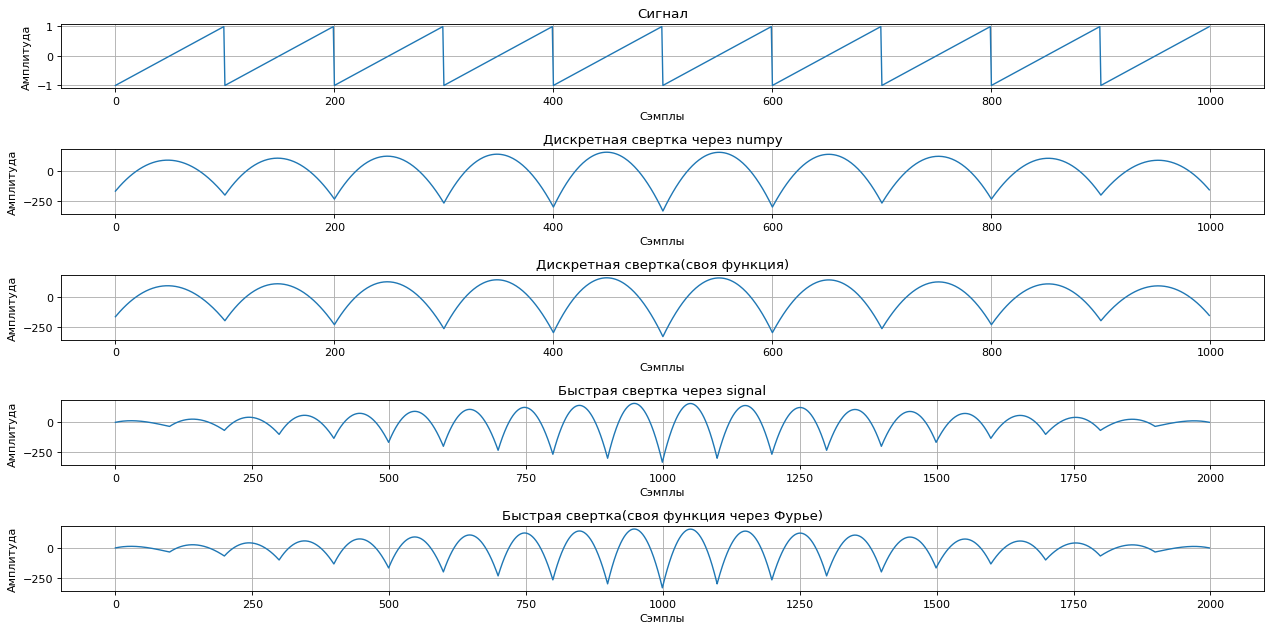

In [ ]:
# list of frequencies
f_list = [x, np_convolve_discr, my_convolve_discr, signal_convolve_fast, my_convolve_fast]
t_list = ['Сигнал', 'Дискретная свертка через numpy', 'Дискретная свертка(своя функция)', 'Быстрая свертка через signal', 'Быстрая свертка(своя функция через Фурье)']
# Plot
plt.figure(figsize=(16, 8), dpi=80)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=1.25)
    plt.title(t_list[i])
    plt.xlabel('Сэмплы')
    plt.ylabel('Амплитуда')
    plt.grid()
plt.tight_layout()
plt.show()
